# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [121]:
import pandas as pd
import numpy as np
import matplotlib as plt


student= pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency3\Lab\students-data.csv', sep=',');
print (student);

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2   

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [122]:
## Set the index name of the dataframe to number

student.index.name='number';
print (student);


## Drop missing values

## student1= student.isna();
## We infer that all rows have values and there's no missing value using isna

student1=student.dropna(); 
print (student1)


       school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
number                                                                 
0          GP   F   18       U     GT3       A     4     4   at_home   
1          GP   F   17       U     GT3       T     1     1   at_home   
2          GP   F   15       U     LE3       T     1     1   at_home   
3          GP   F   15       U     GT3       T     4     2    health   
4          GP   F   16       U     GT3       T     3     3     other   
5          GP   M   16       U     LE3       T     4     3  services   
6          GP   M   16       U     LE3       T     2     2     other   
7          GP   F   17       U     GT3       A     4     4     other   
8          GP   M   15       U     LE3       A     3     2  services   
9          GP   M   15       U     GT3       T     3     4     other   
10         GP   F   15       U     GT3       T     4     4   teacher   
11         GP   F   15       U     GT3       T     2     1  serv

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [123]:
## Non-numeric attributes

#print(student1.dtypes);

att_nonnumeric=student1.select_dtypes(exclude=['int64']);

## prints the names of the columns which are non-numerical

print (att_nonnumeric.iloc[0,:]);

school             GP
sex                 F
address             U
famsize           GT3
Pstatus             A
Mjob          at_home
Fjob          teacher
reason         course
guardian       mother
schoolsup         yes
famsup             no
paid               no
activities         no
nursery           yes
higher            yes
internet           no
romantic           no
Name: 0, dtype: object


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [124]:
## Drop variables with less variance

## get all the numerical columns

# store the numerical columns in a list for iteration
att_numeric=student1.select_dtypes(include=['int64']);

a=list(att_numeric); 

# through iteration, removing numerical columns with variance lessthan 1
for i in a:
    if (att_numeric[i].var()<1):
        student1=student1.drop(columns=i);

print (student1);
        
##print ("Variance of {} is {}".format(i, att_numeric[i].var()));

       school sex  age address famsize Pstatus  Medu  Fedu      Mjob  \
number                                                                 
0          GP   F   18       U     GT3       A     4     4   at_home   
1          GP   F   17       U     GT3       T     1     1   at_home   
2          GP   F   15       U     LE3       T     1     1   at_home   
3          GP   F   15       U     GT3       T     4     2    health   
4          GP   F   16       U     GT3       T     3     3     other   
5          GP   M   16       U     LE3       T     4     3  services   
6          GP   M   16       U     LE3       T     2     2     other   
7          GP   F   17       U     GT3       A     4     4     other   
8          GP   M   15       U     LE3       A     3     2  services   
9          GP   M   15       U     GT3       T     3     4     other   
10         GP   F   15       U     GT3       T     4     4   teacher   
11         GP   F   15       U     GT3       T     2     1  serv

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [125]:
## Take the list of all categorical variables

##  att_nonnumeric contains the non-numerical/categorical variables as covered in problem 2
# put the categorical columns in a list
a=list(att_nonnumeric); 

# Converting all Categorical variables into numerical variables
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder();
student1[a]=student1[a].apply(lambda col : LE.fit_transform(col));

# prints the values with values converted for categorical
student1


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [108]:
# convert the continuous values into binary values

a=list(student1); 


# If the value of G1,G2 and G3 is >=10 then put them into 1 bucket, else into 0 bucket
student1["G1"]=student1["G1"].map(lambda x: 1 if x>=10 else 0);
student1["G2"]=student1["G2"].map(lambda x: 1 if x>=10 else 0);
student1["G3"]=student1["G3"].map(lambda x: 1 if x>=10 else 0);

student1
#print (student1);
        
##print ("Variance of {} is {}".format(i, att_numeric[i].var()));


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [112]:
# Split the variables into features and Targets

# Y as G3
Y= student1['G3'];

# Remaining variables as X
X= student1.drop(columns=['G3']);



        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   
5            0    1   16        1        1        1     4     3     3     2   
6            0    1   16        1        1        1     2     2     2     2   
7            0    0   17        1        0        0     4     4     2     4   
8            0    1   15        1        1        0     3     2     3     2   
9            0    1   15        1        0        1     3     4     2     2   
10           0    0   15        1        0        1 

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [128]:
# Split the data into training and test

from sklearn.model_selection import train_test_split

## Splitting training and test with 300 records in training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=300, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);


(95, 26) (300, 26)
(95,) (300,)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [166]:
# Model implementation

from sklearn.linear_model import LogisticRegression

## Creating Logistic Regression for the feature and training set

lr=LogisticRegression();

lr.fit(X_train,Y_train);


C:\Users\sriram.kannan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [133]:
# Intercept of the model

print ("Y Intercept is", lr.intercept_);

Y Intercept is [0.20850531]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [156]:
## Finding the coefficients of each feature in the model

  
coeff = pd.DataFrame( lr.coef_, columns=X.columns)  
coeff

## prints the variable which has the highest coefficient
## this column has the highest impact on the dependent variable

print(coeff.idxmax(axis=1))


0    G2
dtype: object


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [159]:
## predicting the test set with the model built

prediction_test = lr.predict(X_test)

In [160]:
## predicting the training set with the model built

prediction_train = lr.predict(X_train)

In [165]:
## calculating the score for test and training

score_test = lr.score(X_test, Y_test)
print("score of test is", score_test)

score_train = lr.score(X_train, Y_train)
print("score of train is", score_train)

score of test is 0.8733333333333333
score of train is 0.9578947368421052


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [221]:
# read the data of given bc2 file

fna= pd.read_csv(r'C:\Users\sriram.kannan\Desktop\PGP-AIML\Residency3\Lab\bc2.csv', sep=',');
print (fna);

          ID  ClumpThickness  CellSize  CellShape  MarginalAdhesion  \
0    1000025               5         1          1                 1   
1    1002945               5         4          4                 5   
2    1015425               3         1          1                 1   
3    1016277               6         8          8                 1   
4    1017023               4         1          1                 3   
5    1017122               8        10         10                 8   
6    1018099               1         1          1                 1   
7    1018561               2         1          2                 1   
8    1033078               2         1          1                 1   
9    1033078               4         2          1                 1   
10   1035283               1         1          1                 1   
11   1036172               2         1          1                 1   
12   1041801               5         3          3                 3   
13   1

### Observe the no.of records in dataset and type of each feature 

In [222]:
# No of records

no=len(fna.index)
print ("No of records is",no)

# Type of each feature

datatype=fna.dtypes;
print(datatype);

No of records is 699
ID                           int64
ClumpThickness               int64
CellSize                     int64
CellShape                    int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
NormalNucleoli               int64
BlandChromatin               int64
Mitoses                      int64
Class                        int64
dtype: object


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [223]:
# Summary statistics to analyse the data

a=fna.describe().transpose();
a

## Outliers

## Since the range of columns is defined amd also the records having maximum value of the range are extremes, we don't need to exclude them for computation.


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
CellSize,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
CellShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MarginalAdhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingleEpithelialCellSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
NormalNucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
BlandChromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [224]:
## Encoding treatment

## Given dataset does not contain categorical variables, so there's no encoding needed for the given dataset to convert any categorical variable into numerical values


### Check Missing Values

In [225]:
# Missing values
# identify rows with null values in the given dataset

null_fna = fna[fna.isnull().any(axis=1)]
null_fna
# From above, we see there's no row with missing value, hence no missing value imputation is needed

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [228]:
## To get the top value of Bare Nuclei
desc=fna.describe(include='all'); desc

## Top value of Bare Nuclei is 1 from the table

## Replace the "?" values of Bare Nuclei with top value

fna['BareNuclei']=fna['BareNuclei'].map(lambda x: 1 if x=='?' else x);
fna

## To confirm whether replace has worked
#a=fna.loc[fna['BareNuclei']=='?']
#a


,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Print and plot the distribution of target variable (Class - using Histogram) 

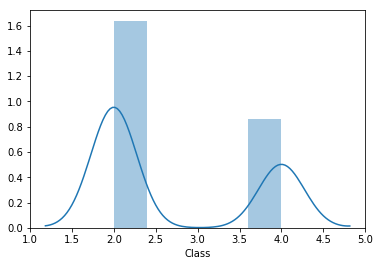

In [229]:
# Distribution of Class

x=fna['Class'];

#Using seaborn
import seaborn as sns
sns.distplot(x);

## Matplotlib

#import matplotlib.pyplot as plt
#plt.hist(x, normed=True, bins=30)
#plt.ylabel('Probability');


### convert the datatype of Bare Nuclei to `int`

In [231]:
# convert the datatype into an integer

fna['BareNuclei']=fna['BareNuclei'].astype('int64');



### Standardization of Data (Use Standard Scaler)

In [232]:
# import the libraries for standardisation

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# bring all the columns of fna to a list and standardize them
# since there're no categorical columns, one-hot encoding is not required

a=list(fna)
ct = ColumnTransformer([("scaling", StandardScaler(), a)]);


                        
                        

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

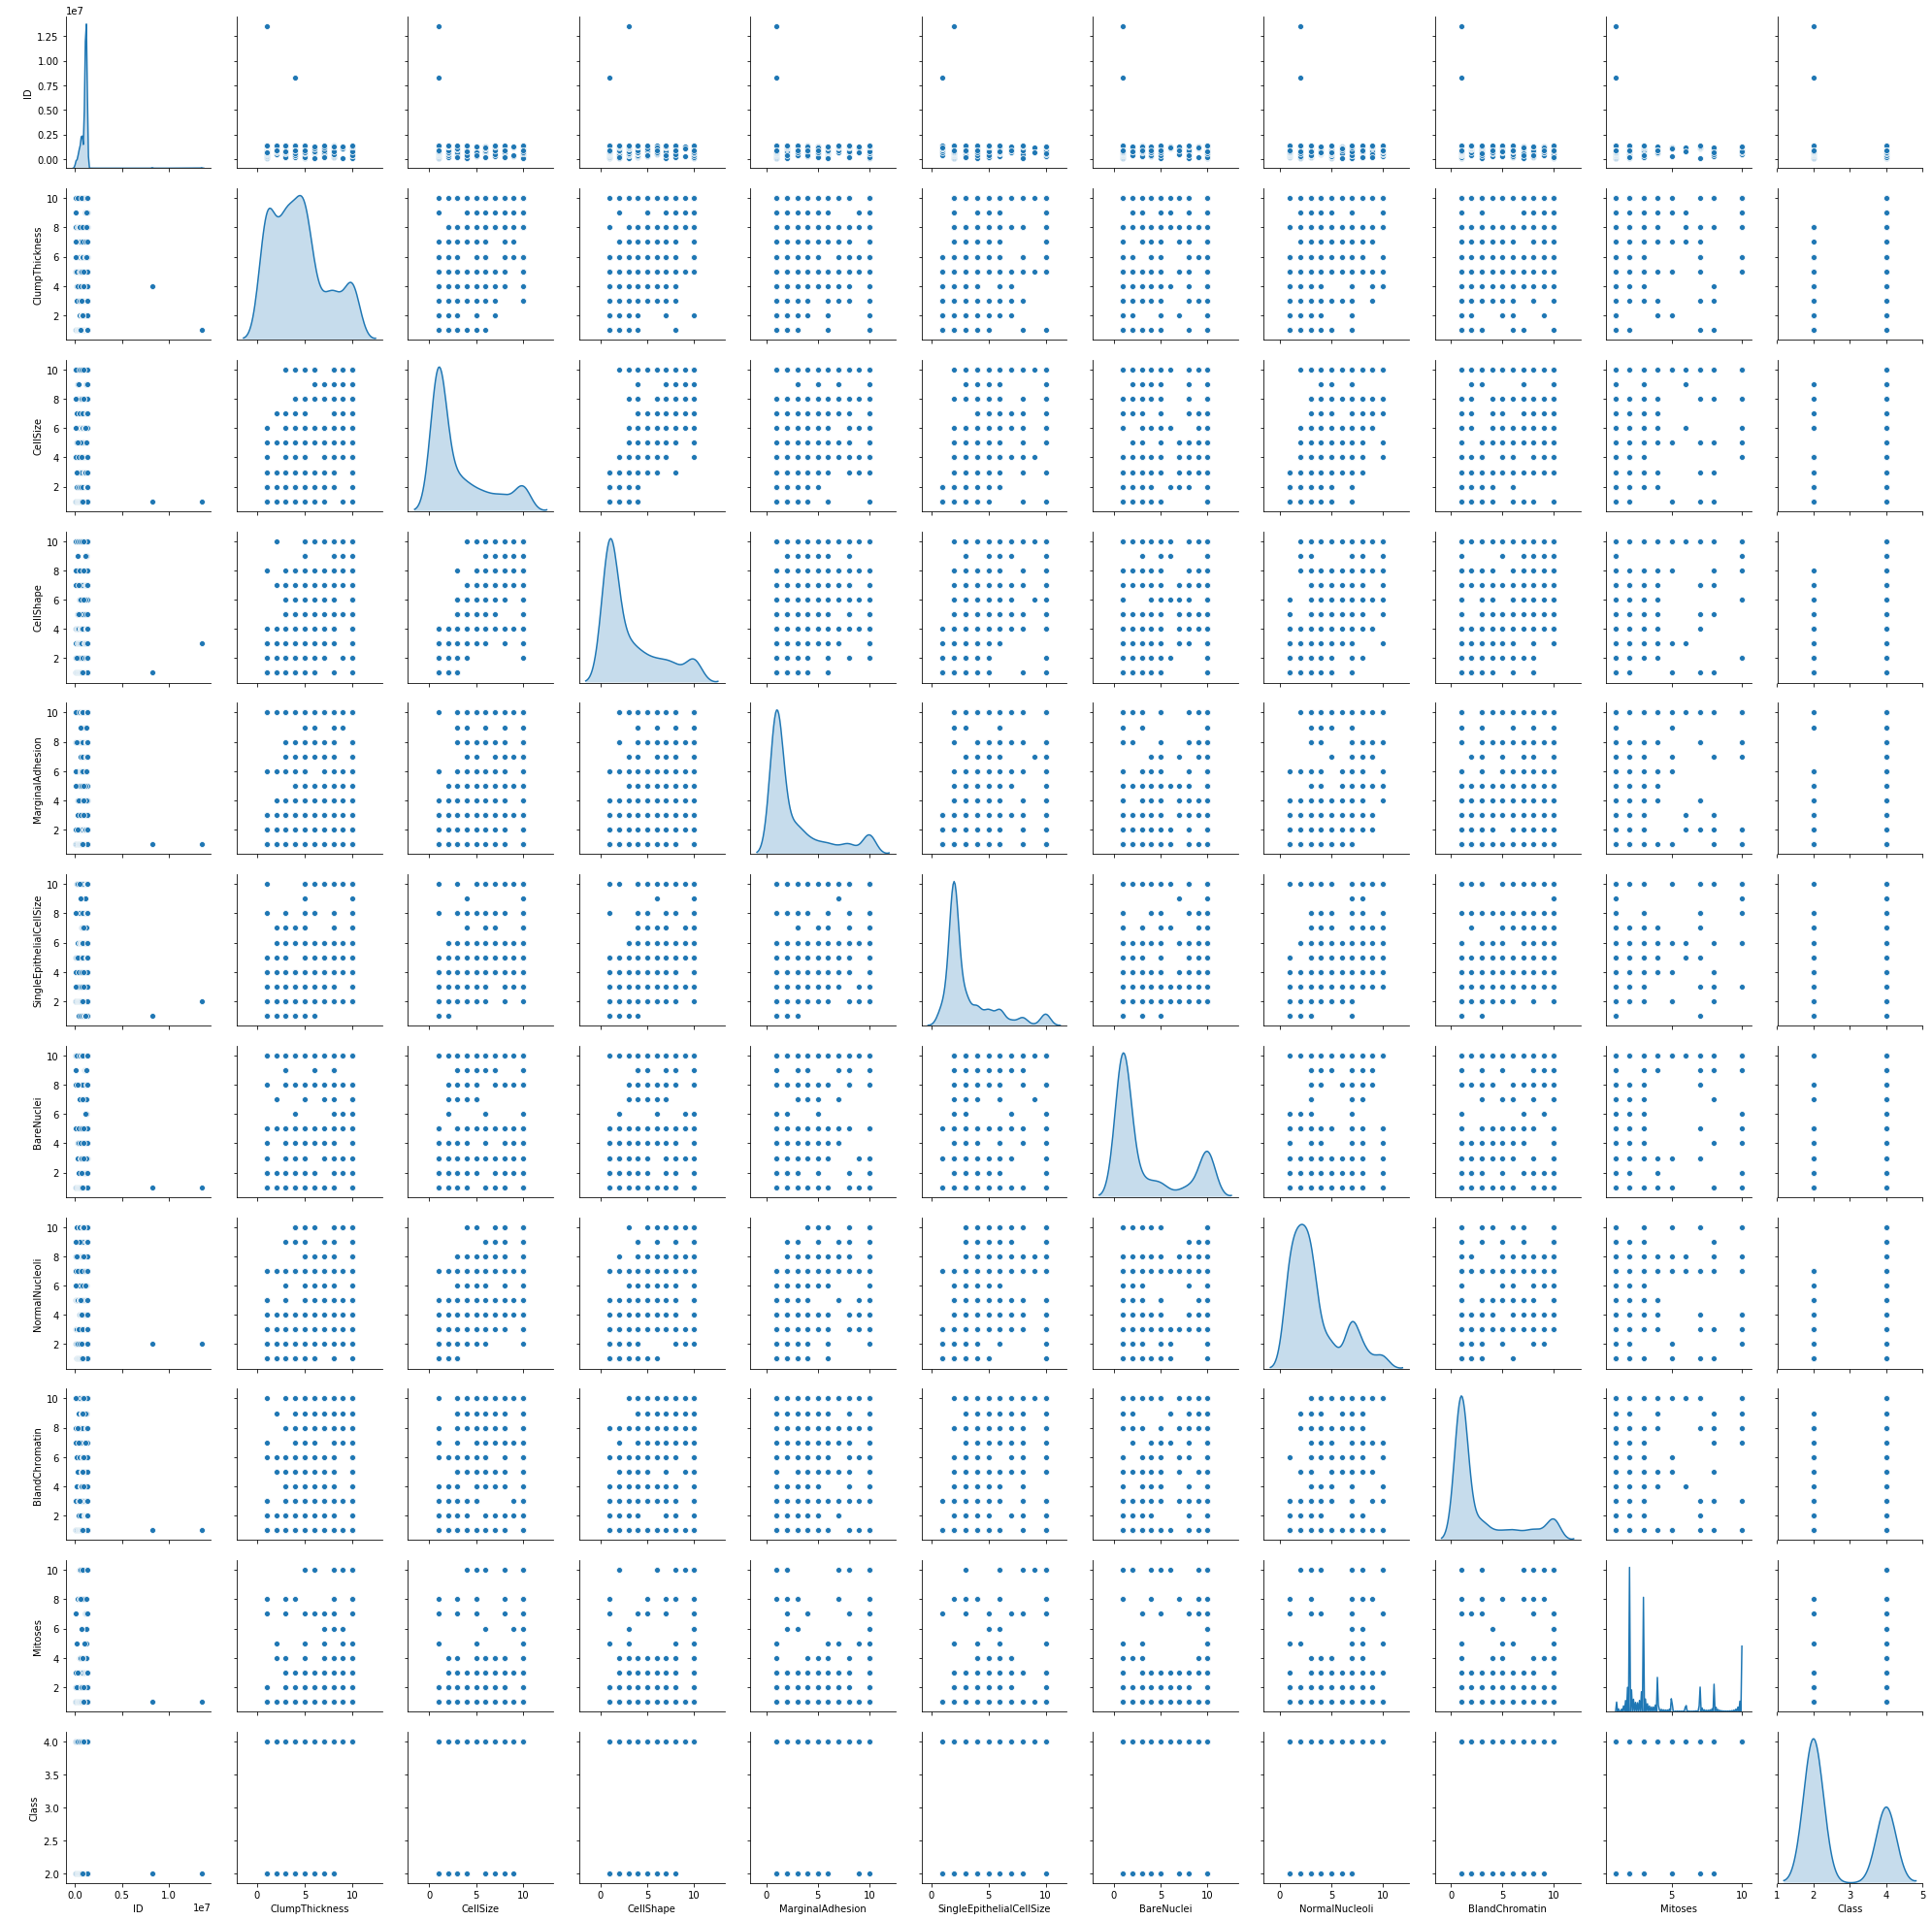

In [233]:

import seaborn as sns
fna = fna.iloc[:,0:11];
sns.pairplot(fna, diag_kind='kde') 

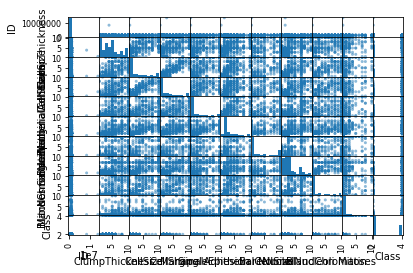

In [237]:
pd.plotting.scatter_matrix(fna, alpha=0.5)

## To find the correlation among variables to determine which are most related or collinear among each other

#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    fna = pd.DataFrame()
    fna["Variable"] = X.columns
    fna["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(fna.round(1))

vif=VIF("""Class ~ ID + ClumpThickness + CellSize 
        + CellShape + MarginalAdhesion + SingleEpithelialCellSize + BareNuclei + NormalNucleoli + BlandChromatin + Mitoses
""",fna)
vif  

## From the VIF plot, we see that Cellsize and Cellshape have higher collinearity, hence we can remove one of them

fna=fna.drop(columns=['CellShape']);



### Divide the dataset into feature set and target set

In [238]:
# Split the dataset into features and target

#Dropping Class from X set
X= fna.drop(columns=['Class']);

Y= fna['Class'];

### Divide the Training and Test sets in 70:30 

In [239]:
# Divide the dataset into training and test
# Ratio is 7:3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);

(489, 9) (210, 9)
(489,) (210,)


### Model 1 : Implement a default Decision Tree model with no attributes

In [248]:
# import Decision Tree model library 
from sklearn.tree import DecisionTreeClassifier

# Since the given problem is a classification model
# Classifier is used

dt_model1 = DecisionTreeClassifier(criterion = 'entropy' )
dt_model1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [249]:
# Feature importances

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
ID                        0.000000
ClumpThickness            0.041349
CellSize                  0.742459
MarginalAdhesion          0.018786
SingleEpithelialCellSize  0.023718
BareNuclei                0.163850
NormalNucleoli            0.009838
BlandChromatin            0.000000
Mitoses                   0.000000


### Check the training & test accuracy of model 1 

In [250]:
print ("Accuracy of test set is", dt_model.score(X_test , Y_test))
print ("Accuracy of training set is", dt_model.score(X_train , Y_train))

Accuracy of test set is 0.9380952380952381
Accuracy of training set is 0.9775051124744376


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [251]:
# Implement the decision tree with Depth=10 and leaf nodes=5

dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=5 )
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the training & test accuracy of model 2

In [247]:
## Accuracy using Iteration 2 by setting leaf node and depth

print ("Accuracy of test set is", dt_model2.score(X_test , Y_test))
print ("Accuracy of training set is", dt_model2.score(X_train , Y_train))

Accuracy of test set is 0.9380952380952381
Accuracy of training set is 0.9775051124744376


### Print the confusion matrix of model 1 and model 2

In [257]:
# Confusion Matrix of Model1 

import sklearn
Y_predict = dt_model1.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, Y_predict))



[[136   1]
 [ 10  63]]


In [258]:
# Confusion Matrix of Model2

import sklearn
Y_predict = dt_model2.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, Y_predict))

[[132   5]
 [  8  65]]
